### **CC57 - MACHINE LEARNING - CLASIFICADOR SUPPORT VECTOR MACHINE (SVM)**

### **Actividad #4: Detección de infedilidad en un matrimonio**


Los datos provienen de statsmodels disponible en: https://www.statsmodels.org/stable/index.html

El conjunto de datos contiene informacion sobre las caracteriticas de la esposa en la relacion marital (edad, religion, numero de hijos, educacion, ocupacion,  cantidad de infidelidades, etc). Este conjunto de datos se puede tratar como un problema de clasificación creando una nueva variable binaria infiel (¿la esposa tuvo al menos una infidelidad?) e intentando predecir la clasificación para cada esposa.


El conjunnto de datos **infiel.csv** contempla 6366 observaciones en 9 variables.  Su estructura es la siguiente:

**- 1. rate_marriage:**woman's rating of her marriage (1 = very poor, 5 = very good)

**- 2. age:** woman's age

**- 3. yrs_married:**number of years married

**- 4. children:** number of children

**- 5. religious:** woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

**- 6. educ:** level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

**- 7. occupation:** woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

**- 8. occupation_husb:** husband's occupation (same coding as above)

**- 9. affairs:** time spent in extra-marital affairs

Se solicita lo siguiente:

- Cargar los datos
- Realizar un analisis visual y preprocesamiento de los datos
- Crear (3) modelos utilizando el **clasificador SVM** para predecir si una esposa es o no infiel dentro de la relacion marital.  

  -  **Modelo #1:** Clasificador SVM basico (sin parametros)
  -  **Modelo #2:** Clasificador SVM con hiperparametros
  -  **Modelo #3:** Clasificador SVM con hiperparametros | Data sintetica

- Visualizar los resultados por modelo
  -  Reporte de Clasificacion
  -  Matriz de Confusion
- Evaluar el modelo: explique sus conclusiones



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## <font color=blue>0. Cargar Librerias</font>


In [ ]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

## <font color=blue>1. Analisis Exploratorio de los Datos</font>


In [ ]:
#Cargar archivo de datos
data_original = pd.read_csv("/content/drive/MyDrive/Septimo Ciclo/Machine Learning/Semana 9/Miercoles/Actividad #4: Clasificacion de infidelidad - SVM/infiel.csv")

| **Variable**         | **Descripción**                                         | **Rango / Codificación**                                                                                                                                              |
| -------------------- | ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **rate\_marriage**   | Calificación que da la mujer a su matrimonio            | 1 = muy pobre, 5 = muy bueno                                                                                                                                          |
| **age**              | Edad de la mujer                                        | Edad en años                                                                                                                                                          |
| **yrs\_married**     | Años que lleva casada                                   | Número de años                                                                                                                                                        |
| **children**         | Número de hijos                                         | Número entero                                                                                                                                                         |
| **religious**        | Calificación que da la mujer sobre qué tan religiosa es | 1 = nada religiosa, 4 = muy religiosa                                                                                                                                 |
| **educ**             | Nivel de educación                                      | 9 = primaria, 12 = secundaria, 14 = algo de universidad, 16 = graduada universitaria, 17 = algo de posgrado, 20 = posgrado avanzado                                   |
| **occupation**       | Ocupación de la mujer                                   | 1 = estudiante, 2 = agrícola/semi-hábil/no calificado, 3 = oficina, 4 = docente/enfermera/escritora/técnica/hábil, 5 = gerente/negocios, 6 = profesional con posgrado |
| **occupation\_husb** | Ocupación del esposo                                    | Misma codificación que occupation                                                                                                                                     |
| **affairs**          | Tiempo dedicado a relaciones extramaritales             | Medida del tiempo (puede ser cantidad o frecuencia, según contexto)                                                                                                   |


In [ ]:
#Visualizar primeros registros del conjunto de datos
data_original.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [ ]:
data_original.shape

(6366, 9)

In [ ]:
data_original['Infidelidad'] = data_original['affairs'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
print(data_original['Infidelidad'].value_counts())

Infidelidad
0    4313
1    2053
Name: count, dtype: int64


In [ ]:
data_original.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Infidelidad
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


### **Análisis de las medidas de tendencia/estadistica**

In [ ]:
# Separar las columnas numéricas
data_numerica = data_original.select_dtypes(include=['number'])

In [ ]:
print(data_numerica.describe())

print("\n=== Mediana y Moda ===")
for columna in data_numerica.columns:
    print(f"\nColumna: {columna}")
    print(f"  Mediana: {data_numerica[columna].median()}")
    print(f"  Moda: {data_numerica[columna].mode()[0]}")


       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  Infidelidad  
count  6366.000000  6366.000000      6366.000000  6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374     0.322495  
std       2.178003     0.942399         1.346435     2.203374     0.467468  
min    

In [ ]:
data_original.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'Infidelidad'],
      dtype='object')

### **Visualizacion de los atributos predictoras y de infidelidad (target)**

Configuración general para los gráficos

In [ ]:
sns.set(style="whitegrid")

In [ ]:
num_vars = data_original.select_dtypes(include='number').columns.drop('Infidelidad')

In [ ]:
n = len(num_vars)
cols = 3
rows = (n + cols - 1) // cols

#### Visualización 1: Distribución de la variable en boxplot

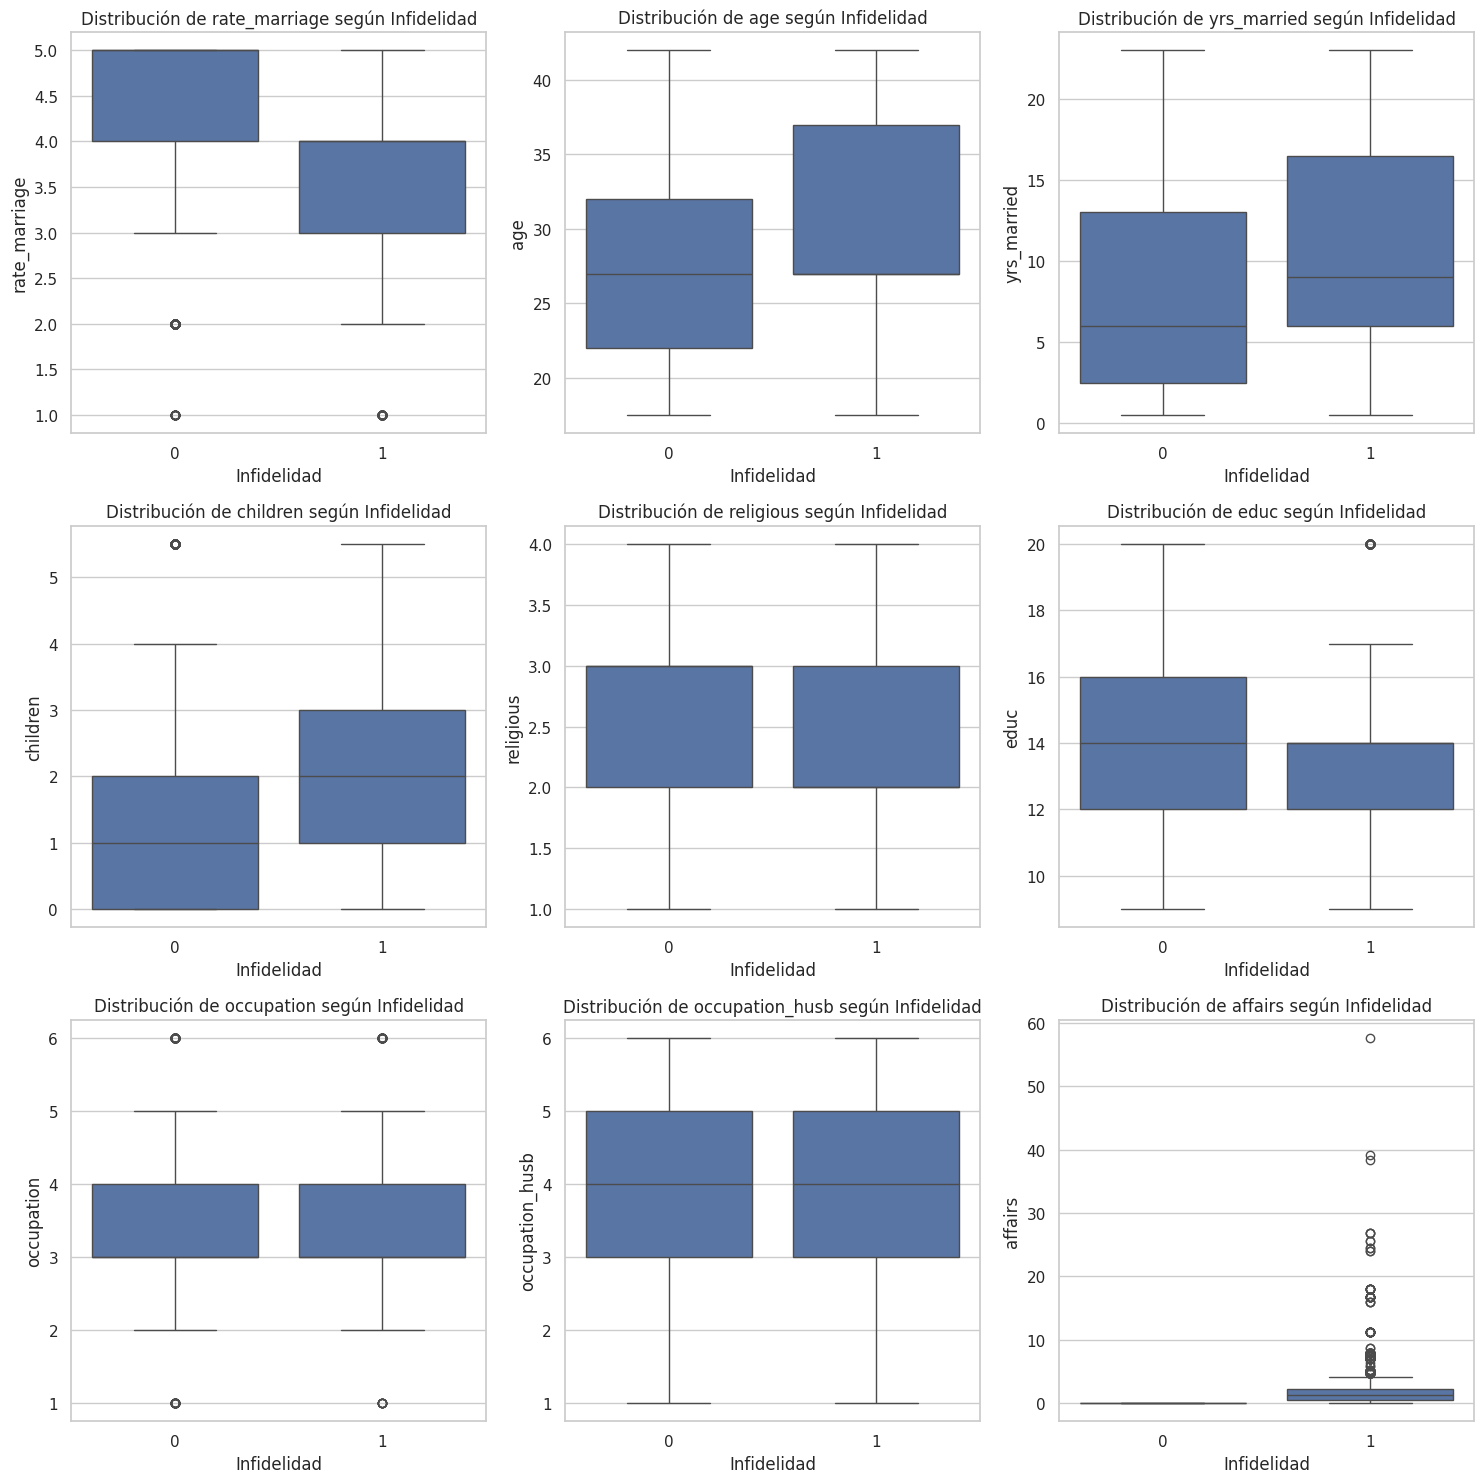

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Aplana para usar un solo índice

for i, var in enumerate(num_vars):
    sns.boxplot(x='Infidelidad', y=var, data=data_original, ax=axes[i])
    axes[i].set_title(f'Distribución de {var} según Infidelidad')

# Si sobran subplots vacíos, los eliminamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

| Variable          | Observaciones clave                                                    | Posible tratamiento o uso en modelo                                    |
| ----------------- | ---------------------------------------------------------------------- | ---------------------------------------------------------------------- |
| `rate_marriage`   | Los infieles tienden a tener un menor puntaje en satisfacción marital. | Mantener como variable predictora. Normalizar si se usa en modelos.    |
| `age`             | Las personas infieles tienden a ser mayores en promedio.               | Mantener. Posible transformación logarítmica si hay sesgo.             |
| `yrs_married`     | Los infieles suelen tener más años de casados.                         | Mantener. Analizar correlación con edad para evitar multicolinealidad. |
| `children`        | Leve tendencia a tener más hijos entre los infieles.                   | Mantener. Tratar valores extremos.                                     |
| `religious`       | Muy poca diferencia entre ambos grupos.                                | Podría excluirse si no aporta al modelo. Confirmar con análisis chi².  |
| `educ`            | Leve tendencia a menor educación en infieles, pero no muy marcada.     | Mantener. Categorizar si se desea simplificar.                         |
| `occupation`      | Distribución similar en ambos grupos.                                  | Podría excluirse si no se relaciona significativamente.                |
| `occupation_husb` | Sin diferencias claras entre grupos.                                   | Evaluar correlación. Puede ser redundante con `occupation`.            |
| `affairs`         | Claramente mayor en infieles, con muchos valores atípicos.             | Alta relevancia. Aplicar transformación logarítmica o winsorización.   |


#### Visualización 2: Distribución de la variable en histplot

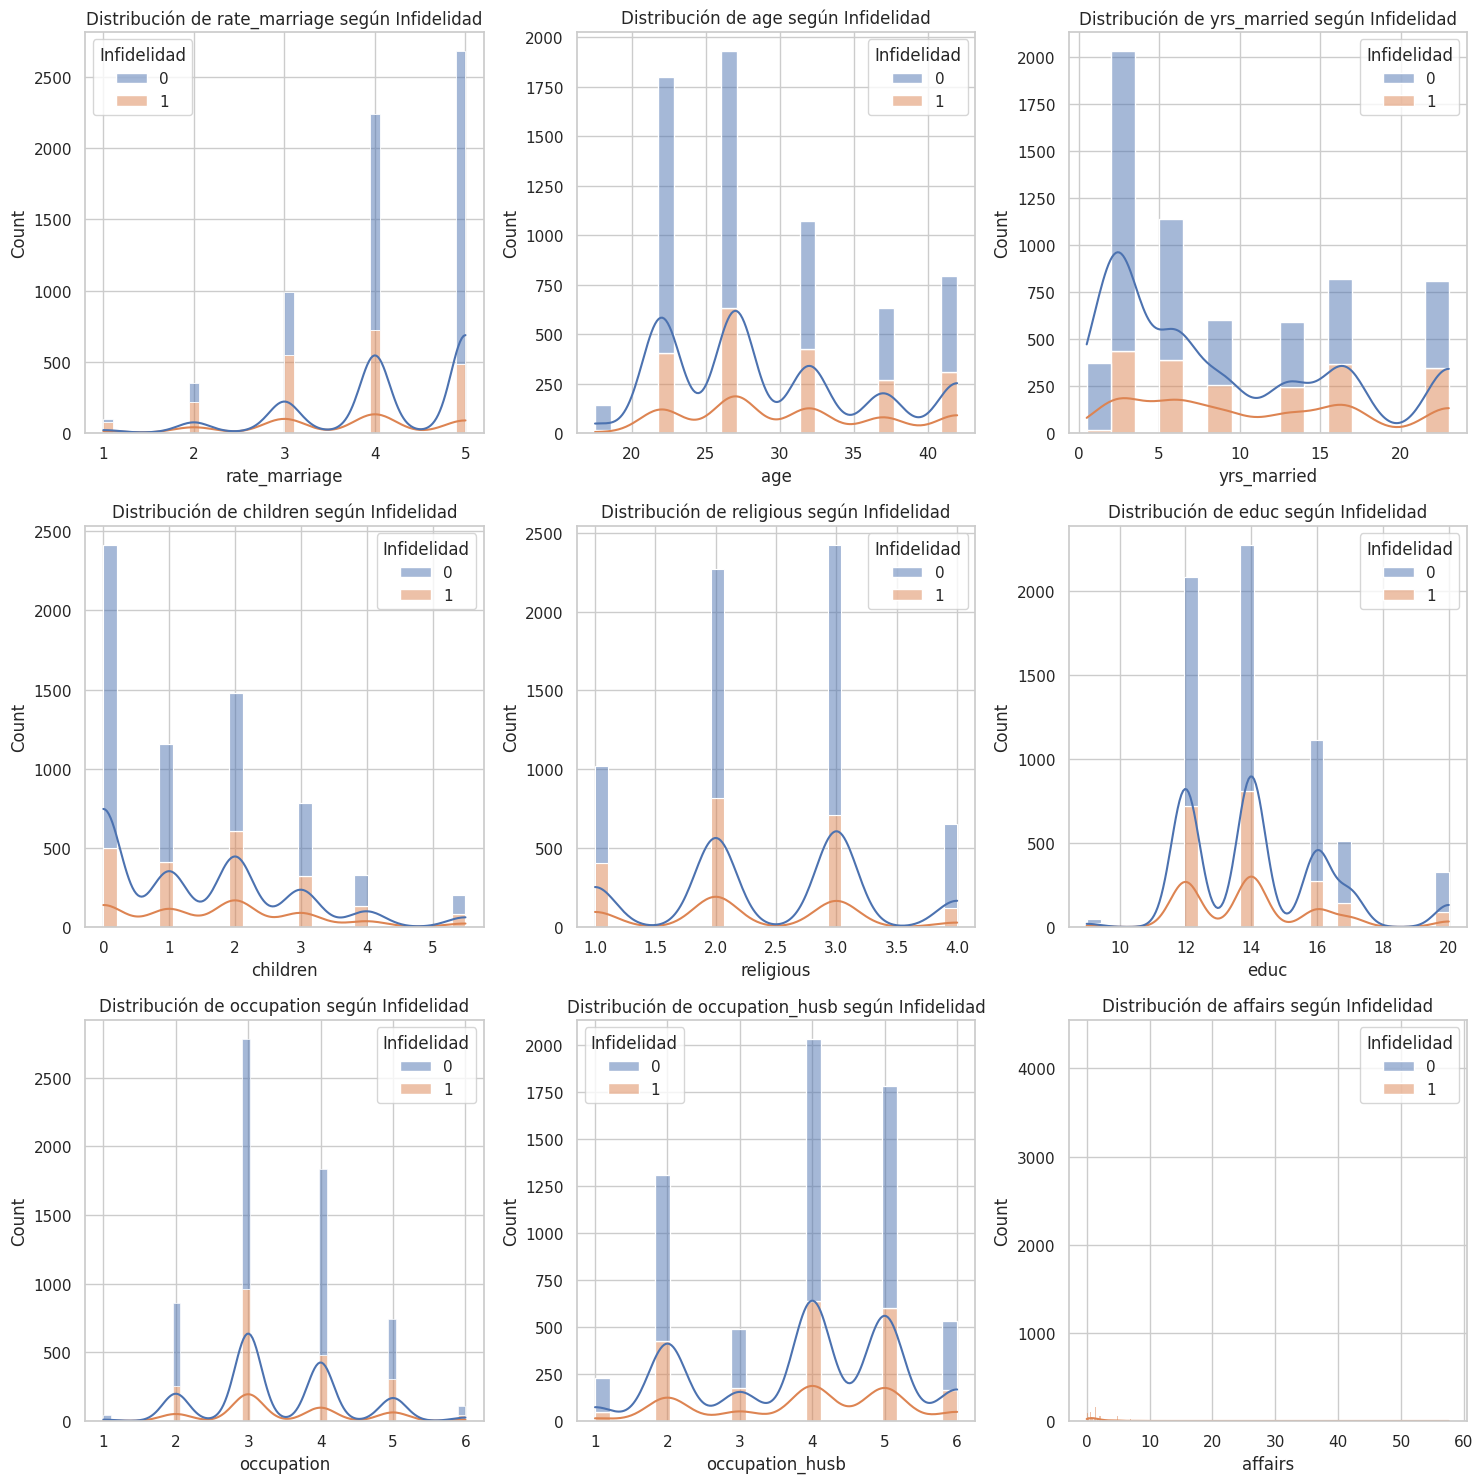

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  # Aplanar para indexar fácilmente

for i, var in enumerate(num_vars):
    sns.histplot(data=data_original, x=var, hue='Infidelidad', kde=True, multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribución de {var} según Infidelidad')

# Si sobran subplots vacíos, los eliminamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


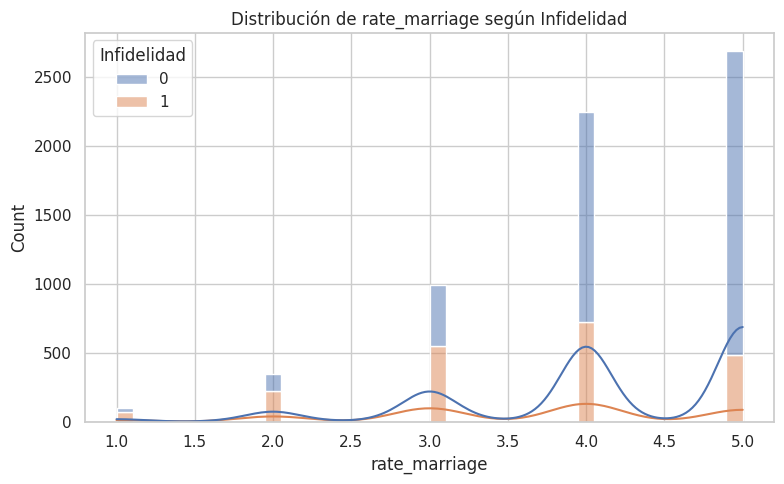

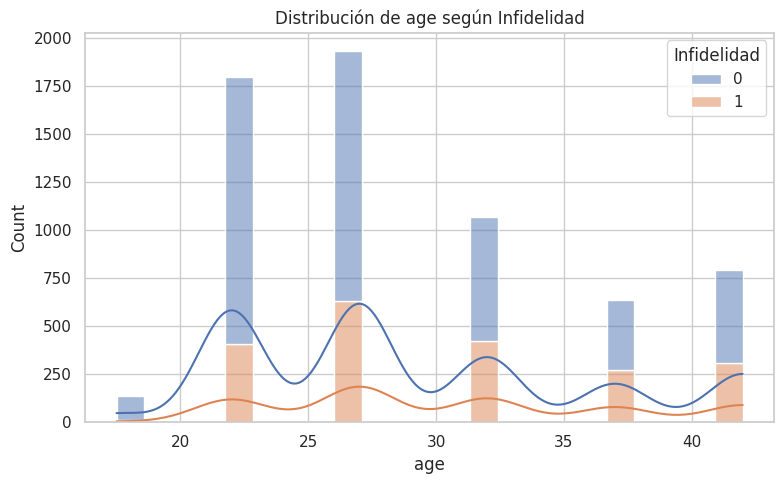

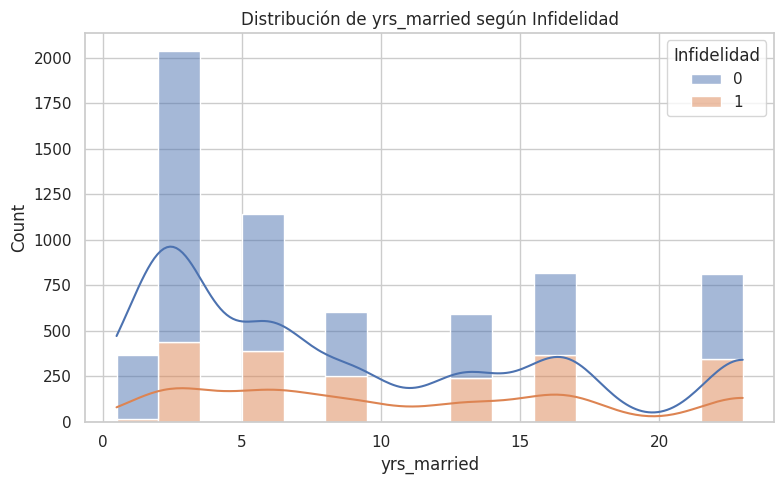

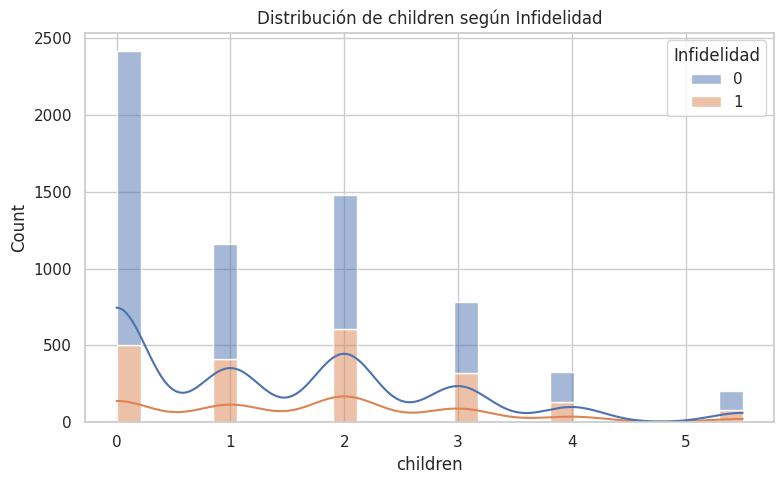

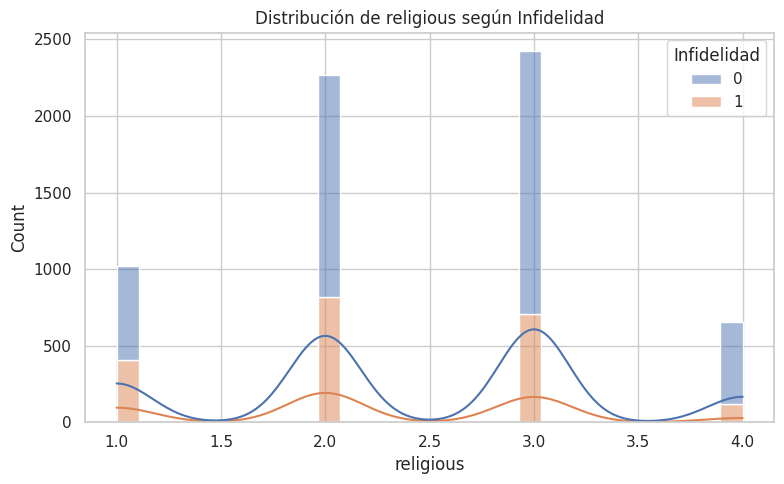

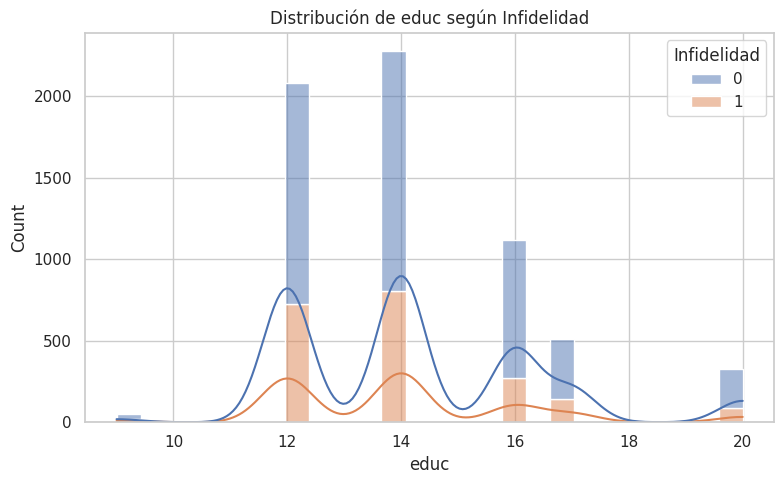

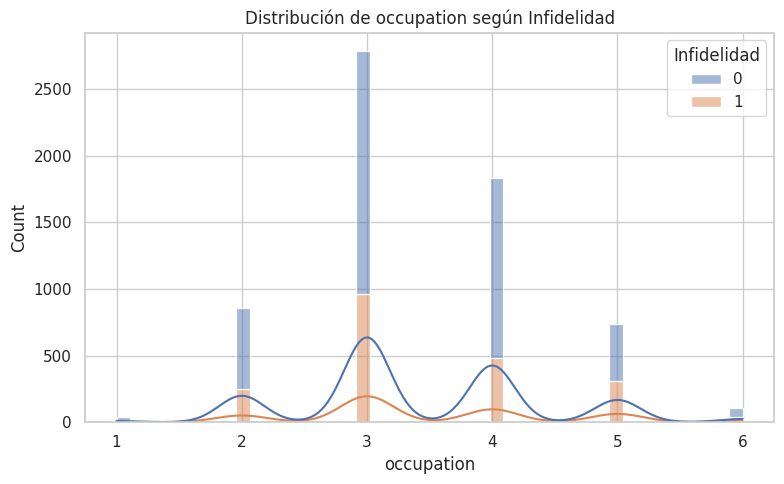

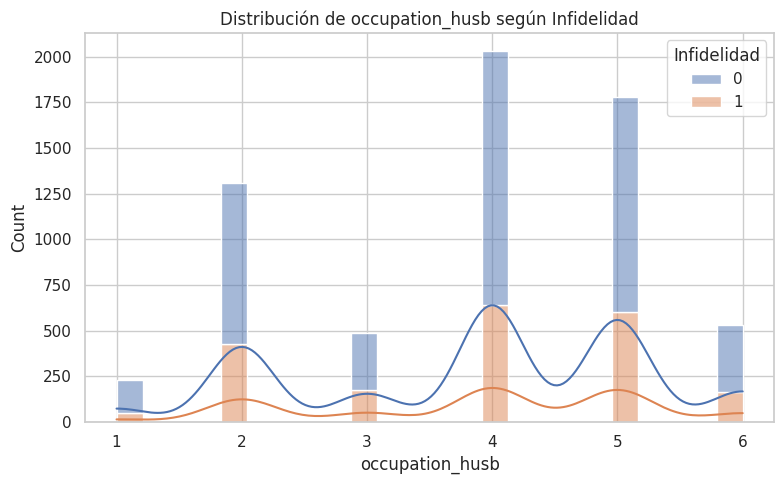

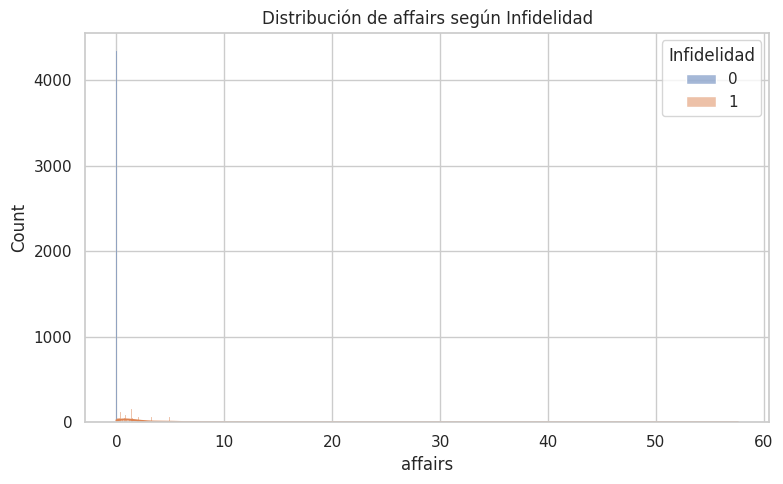

In [ ]:
for var in num_vars:
  figura, eje = plt.subplots(figsize=(8, 5))
  sns.histplot(data=data_original, x=var, hue='Infidelidad', kde=True, multiple='stack', ax=eje)
  eje.set_title(f'Distribución de {var} según Infidelidad')
  plt.tight_layout()
  plt.show()

| Variable          | Observaciones clave                                                                           | Posible tratamiento o uso en modelo                                      |
| ----------------- | --------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------ |
| `rate_marriage`   | Los no infieles se concentran en valores altos (4 y 5). Los infieles tienen mayor dispersión. | Útil como predictor. Puede categorizarse (alta vs. baja satisfacción).   |
| `age`             | Los infieles se concentran entre los 30-40 años. Los no infieles, más en los 20s.             | Importante predictor. Considerar binning por rangos de edad.             |
| `yrs_married`     | Más años de matrimonio tienden a correlacionar con infidelidad.                               | Mantener. Analizar interacción con edad o duración media.                |
| `children`        | Leve incremento en infieles con 2 o más hijos. Sin embargo, no es concluyente.                | Posible categorizar (sin hijos, pocos, muchos). Tratar outliers.         |
| `religious`       | No hay diferencias relevantes en la distribución entre ambos grupos.                          | Baja utilidad predictiva. Puede eliminarse tras prueba de significancia. |
| `educ`            | Ligeramente más infieles con educación media (12-14 años), pero no muy marcado.               | Mantener si mejora el modelo. Opción: categorizar en niveles de estudio. |
| `occupation`      | Distribución muy parecida para ambos grupos.                                                  | Baja utilidad. Puede descartarse.                                        |
| `occupation_husb` | Similar a `occupation`, sin diferencia significativa por infidelidad.                         | Redundante. Evaluar eliminación.                                         |
| `affairs`         | Claramente diferenciada: infieles tienen mayor número de relaciones extramaritales.           | Fuerte predictor. Tratar outliers (picos a la derecha). Log-transformar. |


#### Visualización 3: Distribucion de la variable en countplot

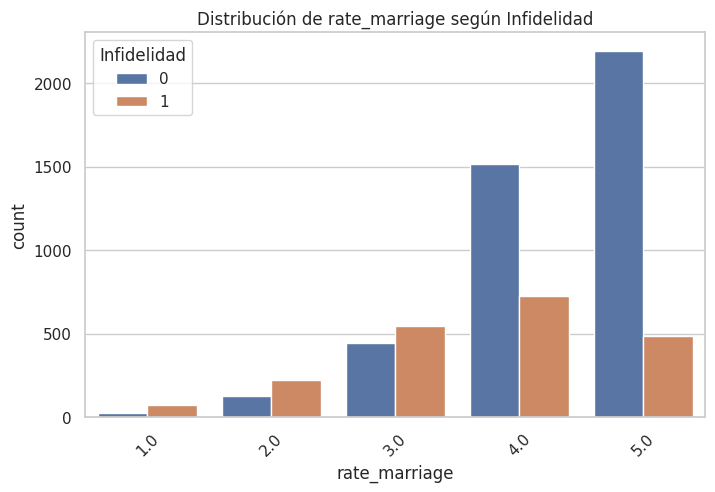

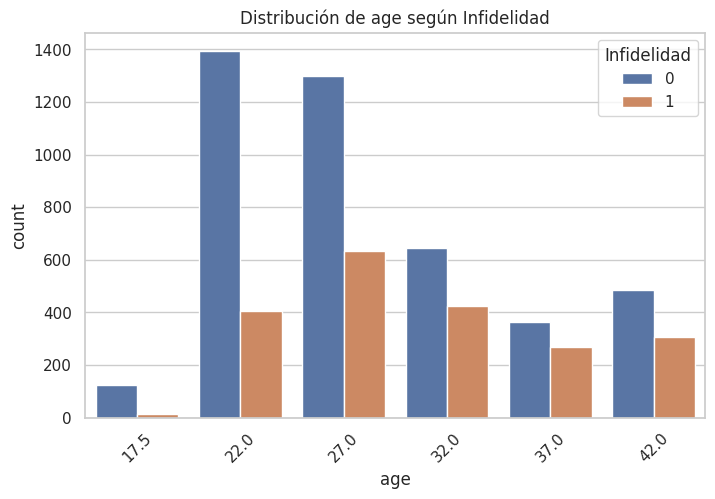

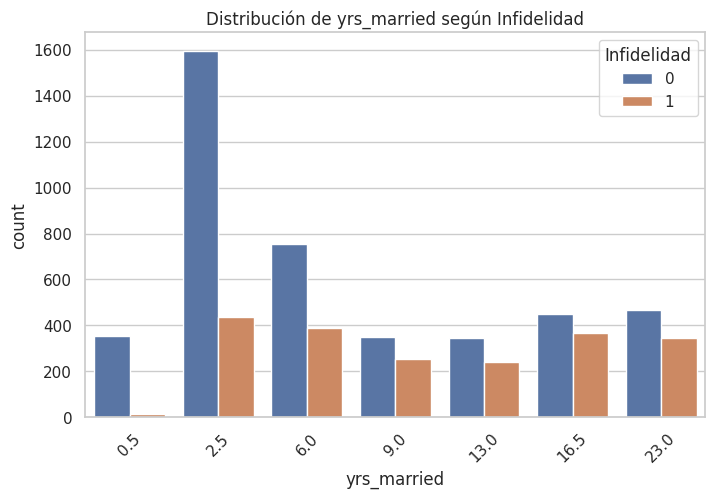

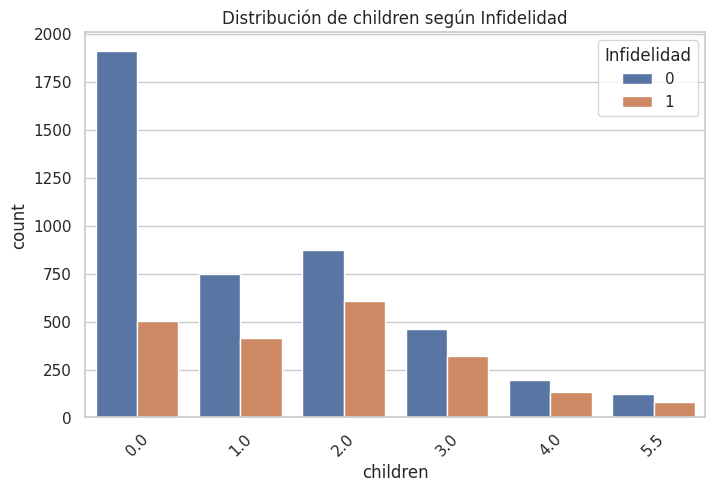

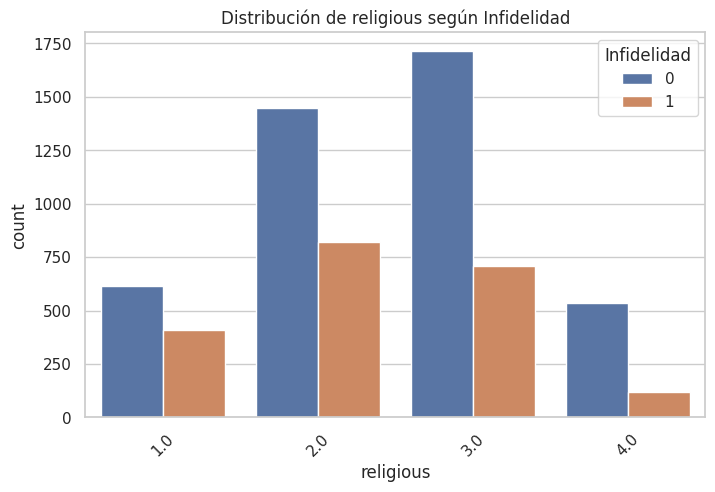

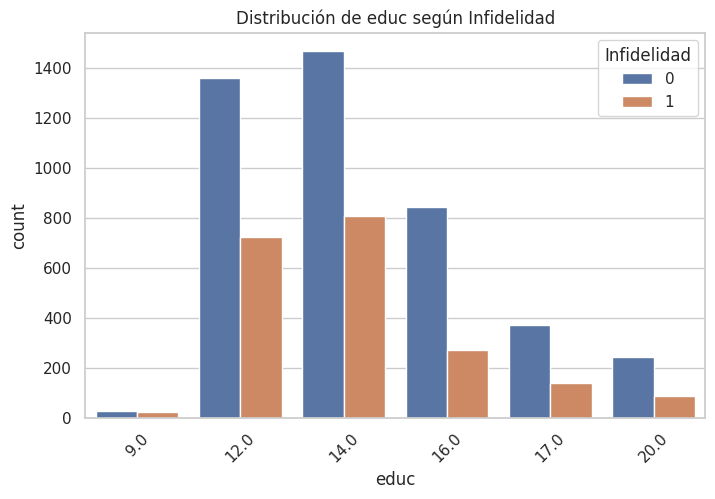

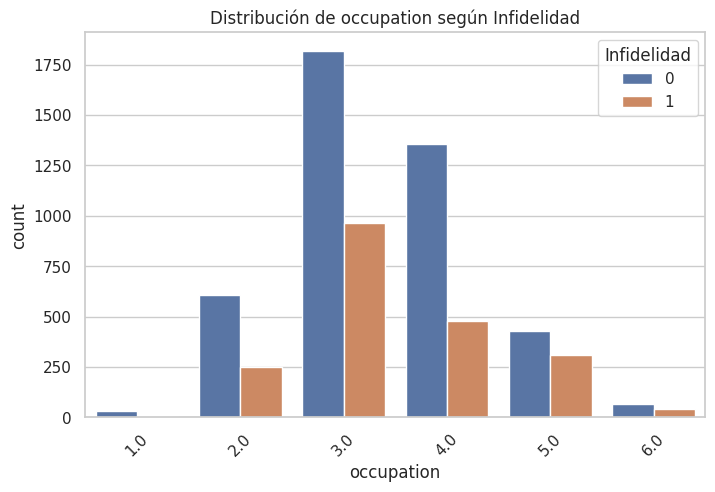

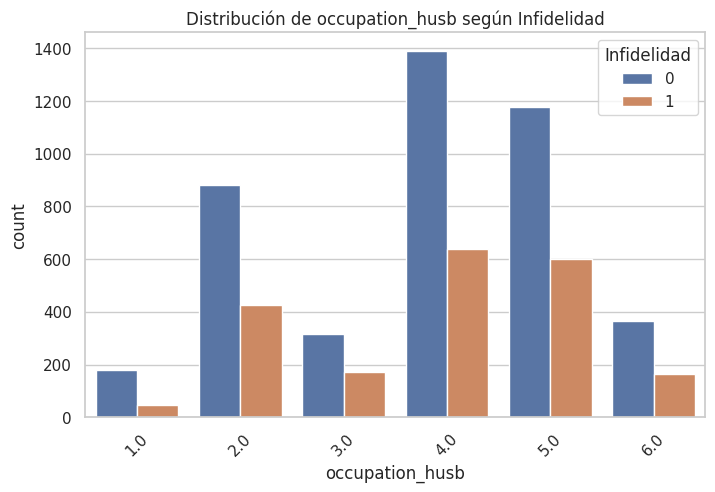

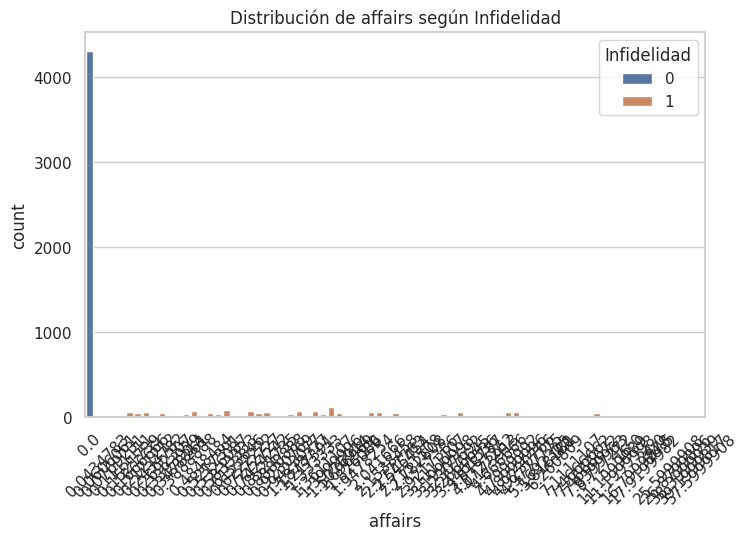

In [ ]:
for var in num_vars:
    plt.figure(figsize=(8,5))
    sns.countplot(x=var, hue= 'Infidelidad', data=data_original)
    plt.title(f'Distribución de {var} según Infidelidad')
    plt.xticks(rotation=45)
    plt.show()

#### Visualización 4: Matriz de correlación para variables

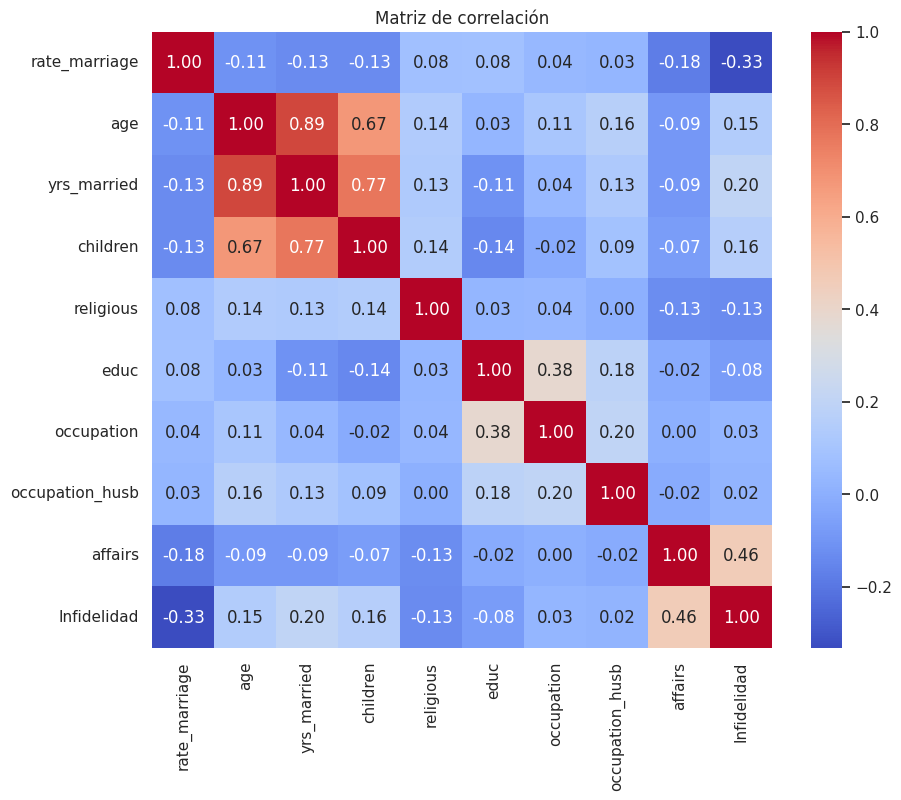

In [ ]:
plt.figure(figsize=(10,8))
corr = data_original.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [ ]:
print(data_original.corr())

                 rate_marriage       age  yrs_married  children  religious  \
rate_marriage         1.000000 -0.111127    -0.128978 -0.129161   0.078794   
age                  -0.111127  1.000000     0.894082  0.673902   0.136598   
yrs_married          -0.128978  0.894082     1.000000  0.772806   0.132683   
children             -0.129161  0.673902     0.772806  1.000000   0.141845   
religious             0.078794  0.136598     0.132683  0.141845   1.000000   
educ                  0.079869  0.027960    -0.109058 -0.141918   0.032245   
occupation            0.039528  0.106127     0.041782 -0.015068   0.035746   
occupation_husb       0.027745  0.162567     0.128135  0.086660   0.004061   
affairs              -0.178068 -0.089964    -0.087737 -0.070278  -0.125933   
Infidelidad          -0.331776  0.146519     0.203109  0.159833  -0.129299   

                     educ  occupation  occupation_husb   affairs  Infidelidad  
rate_marriage    0.079869    0.039528         0.027745 -0.178

| **Variable**      | **Correlación con Infidelidad** | **Tipo de relación**                        | **Recomendación**                                   |
| ----------------- | ------------------------------: | ------------------------------------------- | --------------------------------------------------- |
| `rate_marriage`   |                       **-0.33** | Fuerte negativa                             | ✅ Muy relevante, **incluir** en el modelo           |
| `yrs_married`     |                            0.20 | Moderada positiva                           | ✅ Útil, **incluir**, cuidado con multicolinealidad  |
| `children`        |                            0.16 | Débil positiva                              | ✅ Incluir, aunque el efecto es leve                 |
| `age`             |                            0.15 | Débil positiva, correlado con `yrs_married` | ⚠️ Incluir **solo uno** entre `age` o `yrs_married` |
| `religious`       |                           -0.13 | Débil negativa                              | ✅ Incluir, efecto pequeño pero significativo        |
| `educ`            |                           -0.08 | Muy débil negativa                          | ❌ Poco relevante, se puede excluir                  |
| `occupation`      |                            0.03 | Casi nula                                   | ❌ Excluir o dejar en último orden de importancia    |
| `occupation_husb` |                            0.02 | Casi nula                                   | ❌ Excluir o dejar en último orden de importancia    |


## <font color=blue>2. Preprocesamiento de los datos</font>

El affairs es un dato que no es necesario usar, ya que el tiempo de infideldidad no me es util. Debido a que, ya tengo el feature de infidelidad para saber si fue infiel o no.

In [ ]:
data_proceso = data_original.drop('affairs', axis=1)

### **Verificar datos faltantes y/o duplicados**

Datos faltantes:

In [ ]:
data_proceso.isnull().sum()

,0
rate_marriage,0
age,0
yrs_married,0
children,0
religious,0
educ,0
occupation,0
occupation_husb,0
Infidelidad,0


Datos duplicados:

In [ ]:
data_proceso.duplicated().sum()

np.int64(1178)

In [ ]:
# Paso 1: Filtrar todas las filas duplicadas (incluye todas, no solo una copia)
duplicados = data_proceso[data_proceso.duplicated(keep=False)]

# Paso 2: Ordenar para que las filas duplicadas estén juntas visualmente
duplicados_ordenados = duplicados.sort_values(by=data_proceso.columns.tolist())

# Paso 3: Mostrar el resultado
print(duplicados_ordenados)

      rate_marriage   age  yrs_married  children  religious  educ  occupation  \
1711            1.0  22.0          2.5       1.0        1.0  12.0         3.0   
1866            1.0  22.0          2.5       1.0        1.0  12.0         3.0   
4100            2.0  22.0          2.5       0.0        2.0  12.0         3.0   
5782            2.0  22.0          2.5       0.0        2.0  12.0         3.0   
4670            2.0  22.0          2.5       0.0        2.0  14.0         3.0   
...             ...   ...          ...       ...        ...   ...         ...   
4500            5.0  42.0         23.0       5.5        4.0  14.0         4.0   
4084            5.0  42.0         23.0       5.5        4.0  14.0         4.0   
5992            5.0  42.0         23.0       5.5        4.0  14.0         4.0   
2492            5.0  42.0         23.0       5.5        4.0  17.0         4.0   
4878            5.0  42.0         23.0       5.5        4.0  17.0         4.0   

      occupation_husb  Infi

In [ ]:
data_proceso = data_proceso.drop_duplicates()

aqui luego obvservaremos la ambiguedad de la data proceso

In [ ]:
print("Filas duplicadas:")
print(data_proceso[data_proceso.duplicated()])

Filas duplicadas:
Empty DataFrame
Columns: [rate_marriage, age, yrs_married, children, religious, educ, occupation, occupation_husb, Infidelidad]
Index: []


### **Observacion de las variables numericas**

In [ ]:
num_vars_proceso = data_proceso.select_dtypes(include='number').columns.drop('Infidelidad')

In [ ]:
outlier_counts = {}
total_rows = data_proceso.shape[0]

for var in num_vars_proceso:
    Q1 = data_proceso[var].quantile(0.25)
    Q3 = data_proceso[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_proceso[(data_proceso[var] < lower_bound) | (data_proceso[var] > upper_bound)]
    cantidad = outliers.shape[0]
    porcentaje = (cantidad / total_rows) * 100

    outlier_counts[var] = {
        'Cantidad': cantidad,
        'Porcentaje': round(porcentaje, 2)
    }

# Mostrar como DataFrame ordenado por porcentaje de outliers
import pandas as pd
df_outliers = pd.DataFrame.from_dict(outlier_counts, orient='index')
df_outliers = df_outliers.sort_values(by='Porcentaje', ascending=False)
print(df_outliers)


                 Cantidad  Porcentaje
children              188        3.62
occupation            146        2.81
age                     0        0.00
rate_marriage           0        0.00
yrs_married             0        0.00
religious               0        0.00
educ                    0        0.00
occupation_husb         0        0.00


| Variable          | ¿Útil para predecir infidelidad? | Outliers    | ¿Mantener? | Justificación                                                                                 |
| ----------------- | -------------------------------- | ----------- | ---------- | --------------------------------------------------------------------------------------------- |
| `rate_marriage`   | ✅ Alta correlación negativa      | 0 (0.00%)   | ✅ Sí       | Alta correlación con `Infidelidad` (-0.33). Importante predictor.                             |
| `children`        | ➖ Leve relación positiva         | 188 (3.62%) | ⚠️ Evaluar | Aporta poco valor predictivo y tiene cierta dispersión. Podría transformarse o categorizarse. |
| `occupation`      | ❌ Muy baja correlación (\~0.02)  | 146 (2.81%) | ❌ No       | No discrimina entre infieles y no infieles. Poca utilidad predictiva.                         |
| `age`             | ✅ Moderada relación (+0.14)      | 0 (0.00%)   | ✅ Sí       | Aporta al modelo y no tiene outliers. Ideal.                                                  |
| `yrs_married`     | ✅ Correlación positiva (+0.20)   | 0 (0.00%)   | ✅ Sí       | Aporta como variable de contexto marital. Sin outliers.                                       |
| `religious`       | ❌ Correlación negativa muy baja  | 0 (0.00%)   | ❌ No       | Baja relevancia. Distribución similar entre grupos.                                           |
| `educ`            | ➖ Muy leve relación (-0.07)      | 0 (0.00%)   | ⚠️ Evaluar | Puede servir si se categoriza (niveles). Depende del modelo.                                  |
| `occupation_husb` | ❌ Casi sin correlación (\~0.01)  | 0 (0.00%)   | ❌ No       | Poco valor informativo, similar a `occupation`.                                               |


Mi objetivo es predecir la infidelidad en mujeres casadas, entonces mi conclusion seria esta:

| Acción                       | Variables                                    |
| ---------------------------- | -------------------------------------------- |
| ✅ **Mantener**               | `rate_marriage`, `age`, `yrs_married`        |
| ⚠️ **Evaluar / transformar** | `children`, `educ`                           |
| ❌ **Eliminar**               | `occupation`, `occupation_husb`, `religious` |


In [ ]:
columnas_a_eliminar = ['occupation', 'occupation_husb', 'religious']
data_filtrada_sin_evaluar = data_proceso.drop(columns=columnas_a_eliminar)

In [ ]:
data_filtrada_sin_evaluar.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'educ',
       'Infidelidad'],
      dtype='object')

#### Evaluando

**Winzoricacion:**

In [ ]:
data_filtrada = data_filtrada_sin_evaluar.copy()

for var in ['children']:
    Q1 = data_filtrada[var].quantile(0.25)
    Q3 = data_filtrada[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorización: reemplazar valores por los límites
    data_filtrada[var] = data_filtrada[var].clip(lower=lower_bound, upper=upper_bound)


**Valores atipicos:**

In [ ]:
outlier_counts_filtrada = {}
total_rows = data_filtrada.shape[0]

num_vars_filtrada = data_filtrada.select_dtypes(include='number').columns.tolist()

for var in num_vars_filtrada:
    Q1 = data_filtrada[var].quantile(0.25)
    Q3 = data_filtrada[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_filtrada[(data_filtrada[var] < lower_bound) | (data_filtrada[var] > upper_bound)]
    cantidad = outliers.shape[0]
    porcentaje = (cantidad / total_rows) * 100

    outlier_counts_filtrada[var] = {
        'Cantidad': cantidad,
        'Porcentaje': round(porcentaje, 2)
    }

# Mostramos el resultado
pd.DataFrame(outlier_counts_filtrada)

,rate_marriage,age,yrs_married,children,educ,Infidelidad
Cantidad,0.0,0.0,0.0,0.0,0.0,0.0
Porcentaje,0.0,0.0,0.0,0.0,0.0,0.0


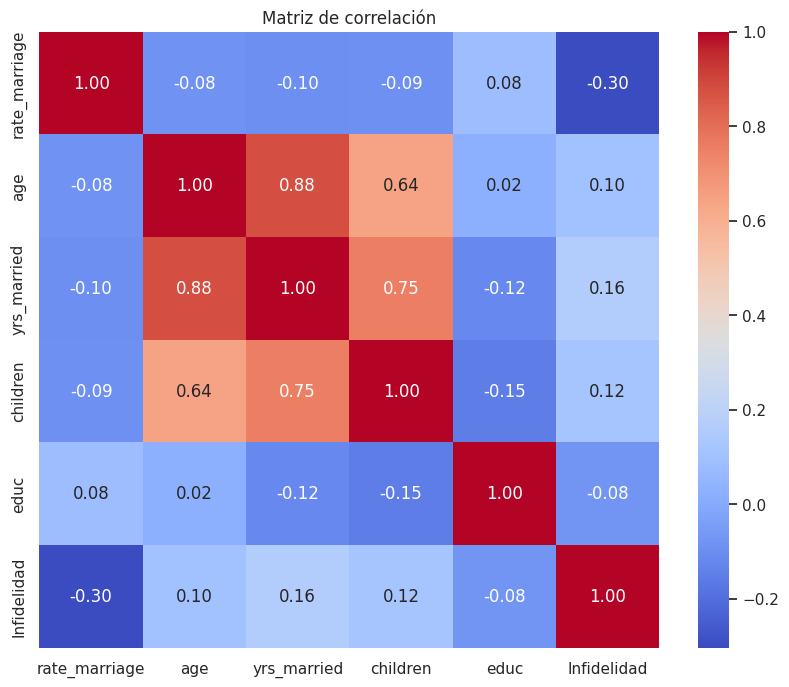

In [ ]:
plt.figure(figsize=(10,8))
corr = data_filtrada.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [ ]:
data_filtrada.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'educ',
       'Infidelidad'],
      dtype='object')

In [ ]:
print(data_filtrada.corr())

               rate_marriage       age  yrs_married  children      educ  \
rate_marriage       1.000000 -0.079642    -0.096575 -0.091666  0.081217   
age                -0.079642  1.000000     0.881681  0.639345  0.024098   
yrs_married        -0.096575  0.881681     1.000000  0.752580 -0.116370   
children           -0.091666  0.639345     0.752580  1.000000 -0.154915   
educ                0.081217  0.024098    -0.116370 -0.154915  1.000000   
Infidelidad        -0.303572  0.100716     0.163619  0.116330 -0.077702   

               Infidelidad  
rate_marriage    -0.303572  
age               0.100716  
yrs_married       0.163619  
children          0.116330  
educ             -0.077702  
Infidelidad       1.000000  


| Variable        | Correlación con Infidelidad | ¿Incluir en modelo? | Comentarios                                    |
| --------------- | --------------------------- | ------------------- | ---------------------------------------------- |
| `rate_marriage` | -0.30                       | ✅ Sí                | Correlación moderada negativa, predictor clave |
| `age`           | +0.10                       | ✅ Sí                | Correlación baja positiva, aporta información  |
| `yrs_married`   | +0.16                       | ✅ Sí                | Correlación baja-moderada positiva, útil       |
| `children`      | +0.12                       | ✅ Sí                | Correlación baja positiva, evaluar             |
| `educ`          | -0.08                       | ❌ No                | Eliminada por baja correlación y poco aporte   |


##### Sin duplicados

In [ ]:
# Crear un nuevo DataFrame sin la columna 'educ'
data_original = data_filtrada.drop(columns=['educ'])


In [ ]:
len(data_original)

5188

##### Sin duplicados y sin ambiguedad, pero con menos datos

verficando ambiguedad antes de entrenar el modelo

In [ ]:
# Agrupamos por todas las columnas excepto 'Infidelidad'
cols_sin_obj = data_original.columns.drop('Infidelidad')

# Contamos cuántos valores únicos de 'Infidelidad' hay por grupo
conteo_ambiguedad = data_original.groupby(list(cols_sin_obj))['Infidelidad'].nunique().reset_index(name='n_unicos')

# Identificamos grupos ambiguos y no ambiguos
grupos_ambiguos = conteo_ambiguedad[conteo_ambiguedad['n_unicos'] > 1]
grupos_no_ambiguos = conteo_ambiguedad[conteo_ambiguedad['n_unicos'] == 1]

# Total de filas involucradas en grupos ambiguos
filas_ambiguas = data_original.merge(grupos_ambiguos.drop(columns=['n_unicos']), on=list(cols_sin_obj), how='inner')
total_filas_ambiguas = len(filas_ambiguas)

# Total de filas no ambiguas
filas_no_ambiguas = data_original.merge(grupos_no_ambiguos.drop(columns=['n_unicos']), on=list(cols_sin_obj), how='inner')
total_filas_no_ambiguas = len(filas_no_ambiguas)

# Resultados
print(f"Grupos ambiguos: {len(grupos_ambiguos)}")
print(f"Filas ambiguas totales: {total_filas_ambiguas}")
print(f"Grupos no ambiguos: {len(grupos_no_ambiguos)}")
print(f"Filas no ambiguas totales: {total_filas_no_ambiguas}")


Grupos ambiguos: 239
Filas ambiguas totales: 4771
Grupos no ambiguos: 176
Filas no ambiguas totales: 417


In [ ]:
from collections import Counter

# Para cada grupo ambiguo, calculamos la moda de 'Infidelidad'
moda_ambiguos = filas_ambiguas.groupby(list(cols_sin_obj))['Infidelidad'].agg(lambda x: Counter(x).most_common(1)[0][0]).reset_index()

# Dataset con filas no ambiguas ya limpias (no necesitan corrección)
data_no_ambiguos = filas_no_ambiguas.copy()

# Dataset corregido: filas ambiguas reemplazadas por su moda
data_corregida = pd.concat([data_no_ambiguos, moda_ambiguos], ignore_index=True)

# Verificamos tamaño y distribución
print(f"Tamaño dataset corregido: {data_corregida.shape}")
print(data_corregida['Infidelidad'].value_counts())


Tamaño dataset corregido: (656, 5)
Infidelidad
0    411
1    245
Name: count, dtype: int64


In [ ]:
data_corregida.duplicated().sum()

np.int64(241)

In [ ]:
data_limpia = data_corregida.drop_duplicates()


In [ ]:
data_limpia.duplicated().sum()

np.int64(0)

In [ ]:
conteo_infidelidad = data_limpia['Infidelidad'].value_counts()
print(conteo_infidelidad)


Infidelidad
0    227
1    188
Name: count, dtype: int64


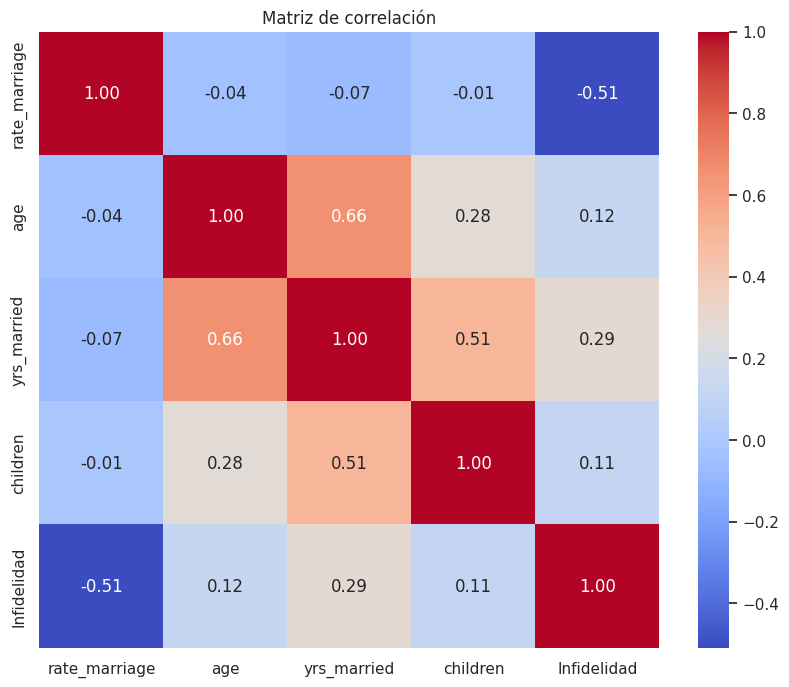

In [ ]:
plt.figure(figsize=(10,8))
corr = data_limpia.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Mostrar la matriz de correlación de las variables numéricas, incluyendo 'Infidelidad'
correlacion = data_limpia.corr()

print(correlacion['Infidelidad'].sort_values(ascending=False))


Infidelidad      1.000000
yrs_married      0.288232
age              0.116396
children         0.111680
rate_marriage   -0.508351
Name: Infidelidad, dtype: float64


| Variable        | Correlación con Infidelidad | Interpretación                                                                                                                      |
| --------------- | --------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| `rate_marriage` | -0.51                       | **Fuerte correlación negativa:** A menor satisfacción en el matrimonio, mayor probabilidad de infidelidad. Muy útil para el modelo. |
| `yrs_married`   | 0.29                        | Moderada correlación positiva: Más años casados, algo más probable infidelidad (podría ser interesante).                            |
| `age`           | 0.12                        | Correlación débil positiva: A mayor edad, un poco más de infidelidad.                                                               |
| `children`      | 0.11                        | Correlación débil positiva: Más hijos, ligeramente más infidelidad.                                                                 |


In [ ]:
variables = ['rate_marriage', 'yrs_married', 'age', 'children']

In [ ]:
for var in variables:
    Q1 = data_limpia[var].quantile(0.25)
    Q3 = data_limpia[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_limpia[(data_limpia[var] < Q1 - 1.5 * IQR) |
                                   (data_limpia[var] > Q3 + 1.5 * IQR)]
    print(f'Variable {var}: {len(outliers)} outliers')


Variable rate_marriage: 0 outliers
Variable yrs_married: 0 outliers
Variable age: 0 outliers
Variable children: 0 outliers


### **Separar variables predictoras y el atributo destino de los datos**

#### Data original

In [ ]:
X_original = data_original.drop(columns=['Infidelidad'])
y_original = data_original['Infidelidad']

#### Data limpia

In [ ]:
X_limpia = data_limpia.drop(columns=['Infidelidad'])
y_limpia = data_limpia['Infidelidad']

## <font color=blue>3. Entrenando los modelos SVM </font>

### **Dividir el conjunto de datos en una proporción de 80: 20**

In [ ]:
from sklearn.model_selection import train_test_split


#### Data original

In [ ]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
)

In [ ]:
print(f"Data original - Train size: {X_train_orig.shape[0]}, Test size: {X_test_orig.shape[0]}")

Data original - Train size: 4150, Test size: 1038


#### Data limpia

In [ ]:
X_train_limp, X_test_limp, y_train_limp, y_test_limp = train_test_split(
    X_limpia, y_limpia, test_size=0.2, random_state=42, stratify=y_limpia
)


In [ ]:
print(f"Data limpia - Train size: {X_train_limp.shape[0]}, Test size: {X_test_limp.shape[0]}")

Data limpia - Train size: 332, Test size: 83


### **Modelo #1: Clasificador SVM basico (sin parametros)**



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Data original

In [ ]:
# Entrenar el modelo SVM con data_original
svm_orig = SVC()

svm_orig.fit(X_train_orig, y_train_orig)

# Predecir con el conjunto de test
y_pred_orig = svm_orig.predict(X_test_orig)

# Resultados
print("Reporte clasificación - Data Original:")
print(classification_report(y_test_orig, y_pred_orig))
print("Matriz de confusión:")
print(confusion_matrix(y_test_orig, y_pred_orig))
print(f"Exactitud: {accuracy_score(y_test_orig, y_pred_orig):.4f}")

Reporte clasificación - Data Original:
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       661
           1       0.64      0.22      0.32       377

    accuracy                           0.67      1038
   macro avg       0.66      0.57      0.55      1038
weighted avg       0.66      0.67      0.62      1038

Matriz de confusión:
[[614  47]
 [295  82]]
Exactitud: 0.6705


#### Data limpia

In [ ]:
# Entrenar el modelo SVM con data_limpia
svm_limp = SVC()

svm_limp.fit(X_train_limp, y_train_limp)

# Predecir con el conjunto de test
y_pred_limp = svm_limp.predict(X_test_limp)

# Resultados
print("Reporte clasificación - Data Limpia:")
print(classification_report(y_test_limp, y_pred_limp))
print("Matriz de confusión:")
print(confusion_matrix(y_test_limp, y_pred_limp))
print(f"Exactitud: {accuracy_score(y_test_limp, y_pred_limp):.4f}")

Reporte clasificación - Data Limpia:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        45
           1       0.70      0.68      0.69        38

    accuracy                           0.72        83
   macro avg       0.72      0.72      0.72        83
weighted avg       0.72      0.72      0.72        83

Matriz de confusión:
[[34 11]
 [12 26]]
Exactitud: 0.7229


### **Modelo #2: Clasificador SVM con hiperparametros**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
kernels = ['linear']
c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gammas = [0.1, 1, 10, 100]

#### Data original

In [ ]:
# Param grid
param_grid = dict(kernel=kernels, C=c, gamma=gammas)

# Clasificador base
svm_all_orig = SVC()

# Búsqueda de hiperparámetros
grid_orig = GridSearchCV(svm_all_orig, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
grid_orig.fit(X_train_orig, y_train_orig)

# Resultados
print("Mejores parámetros para data_original:")
print(grid_orig.best_params_)
print(f"Mejor exactitud: {grid_orig.best_score_:.4f}")

#### Data Limpia

In [ ]:
# Param grid
param_grid = dict(kernel=kernels, C=c, gamma=gammas)

# Clasificador base
svm_all_limp = SVC()

# Búsqueda de hiperparámetros
grid_limp = GridSearchCV(svm_all_limp, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
grid_limp.fit(X_train_limp, y_train_limp)

# Resultados
print("Mejores parámetros para data_limpia:")
print(grid_limp.best_params_)
print(f"Mejor exactitud: {grid_limp.best_score_:.4f}")

Mejores parámetros para data_limpia:
{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Mejor exactitud: 0.7590


In [ ]:
# Definir el modelo con los mejores hiperparámetros encontrados
svm_best = SVC(C=10, gamma=0.1, kernel='linear')

# Entrenar con los datos de entrenamiento (data limpia)
svm_best.fit(X_train_limp, y_train_limp)

# Predecir en el conjunto de prueba
y_pred_best = svm_best.predict(X_test_limp)

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(y_test_limp, y_pred_best))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        45
           1       0.71      0.63      0.67        38

    accuracy                           0.71        83
   macro avg       0.71      0.70      0.71        83
weighted avg       0.71      0.71      0.71        83



### **Modelo #3: Clasificador SVM con hiperparametros | Data sintetica**

In [ ]:
from imblearn.over_sampling import SMOTE

#### Data oirginal

In [ ]:
# Separar características y target
X_orig = data_original.drop(columns=['Infidelidad'])
y_orig = data_original['Infidelidad']

In [ ]:
sms = SMOTE(random_state=123456)
X_sms_orig, y_sms_orig = sms.fit_resample(X_orig, y_orig)

In [ ]:
# División train/test
x_train_sms_orig, x_test_sms_orig, y_train_sms_orig, y_test_sms_orig = train_test_split(
    X_sms_orig, y_sms_orig, test_size=0.2, random_state=42, stratify=y_sms_orig
)


In [ ]:
# Definición de hiperparámetros
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gammas = [0.1, 1, 10, 100]

In [ ]:
svm_sms = SVC()

In [ ]:
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(svm_sms, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train_sms_orig, y_train_sms_orig)

print("Mejores parámetros (data original):", grid.best_params_)

#### Data limpia

In [ ]:
X_limpia = data_limpia.drop(columns=['Infidelidad'])
y_limpia = data_limpia['Infidelidad']

In [ ]:
sms = SMOTE(random_state=123456)
X_sms_limp, y_sms_limp = sms.fit_resample(X_limpia, y_limpia)

In [ ]:
# División train/test
x_train_sms_limp, x_test_sms_limp, y_train_sms_limp, y_test_sms_limp = train_test_split(
    X_sms_limp, y_sms_limp, test_size=0.2, random_state=42, stratify=y_sms_limp
)

In [ ]:
# Definición de hiperparámetros
kernels = ['linear']
c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gammas = [0.1, 1, 10, 100]


In [ ]:
svm_sms = SVC()

In [ ]:
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(svm_sms, param_grid, cv=2, scoring='accuracy')
grid.fit(x_train_sms_limp, y_train_sms_limp)

print("Mejores parámetros (data limpia):", grid.best_params_)

Mejores parámetros (data limpia): {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
svm_sms_best_limp = SVC(**grid.best_params_)
svm_sms_best_limp.fit(x_train_sms_limp, y_train_sms_limp)

# Predicciones y reporte
y_pred_sms_best_limp = svm_sms_best_limp.predict(x_test_sms_limp)
print("Reporte clasificación (data limpia):")
print(classification_report(y_test_sms_limp, y_pred_sms_best_limp))

Reporte clasificación (data limpia):
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        46
           1       0.75      0.67      0.71        45

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



## <font color=blue>4. Visualización de resultados de los modelos </font>
- Reporte de Clasificacion
- Matriz de Confusion
<br>

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [ ]:
# Función para graficar matriz de confusión
def plot_conf_matrix(y_true, y_pred, title="Matriz de Confusión"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.show()
    #print(cm)

# Función para imprimir reporte de clasificación
def print_classification_results(y_true, y_pred, label=""):
    print(f" Reporte de Clasificación - {label}")
    print(classification_report(y_true, y_pred))
    plot_conf_matrix(y_true, y_pred, title=f"Matriz de Confusión - {label}")

### Data Original - SVM sin parámetros

 Reporte de Clasificación - Data Original - SVM sin parámetros
              precision    recall  f1-score   support

           0       0.63      0.87      0.73       661
           1       0.33      0.11      0.17       377

    accuracy                           0.60      1038
   macro avg       0.48      0.49      0.45      1038
weighted avg       0.52      0.60      0.53      1038



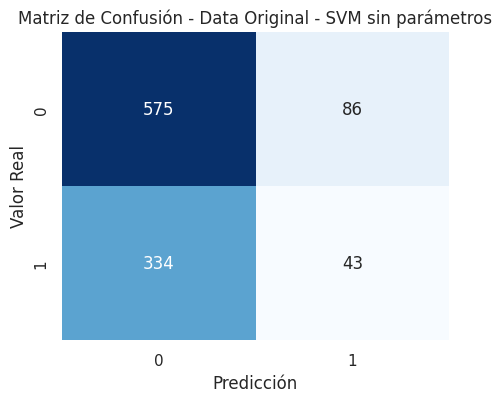

In [ ]:
print_classification_results(y_test_orig, y_pred_orig, label="Data Original - SVM sin parámetros")

### Data Limpia - SVM sin parámetros

 Reporte de Clasificación - Data Limpia - SVM sin parámetros
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        45
           1       0.70      0.68      0.69        38

    accuracy                           0.72        83
   macro avg       0.72      0.72      0.72        83
weighted avg       0.72      0.72      0.72        83



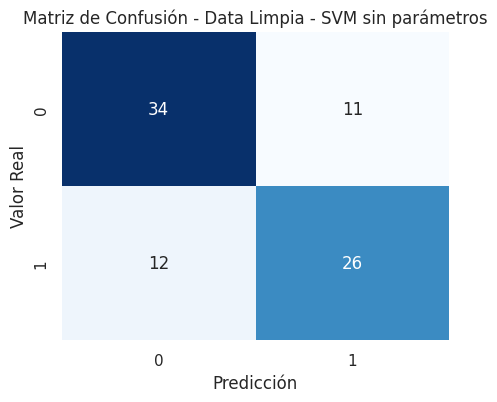

In [ ]:
print_classification_results(y_test_limp, y_pred_limp, label="Data Limpia - SVM sin parámetros")

###  Data Limpia - SVM con Hiperparámetros

 Reporte de Clasificación - Data Limpia - SVM con hiperparámetros
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        45
           1       0.71      0.63      0.67        38

    accuracy                           0.71        83
   macro avg       0.71      0.70      0.71        83
weighted avg       0.71      0.71      0.71        83



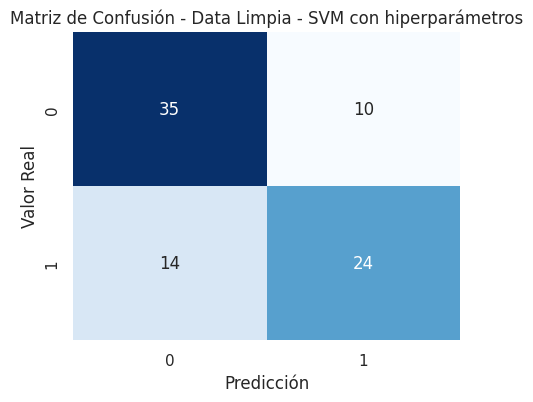

In [ ]:
print_classification_results(y_test_limp, y_pred_best, label="Data Limpia - SVM con hiperparámetros")

### Data Limpia - SVM con Hiperparámetros y SMOTE

 Reporte de Clasificación - Data Limpia - SVM con SMOTE + hiperparámetros
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        46
           1       0.75      0.67      0.71        45

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.72        91



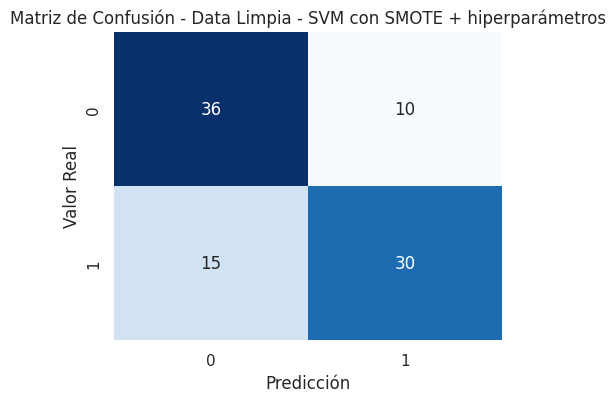

In [ ]:
print_classification_results(y_test_sms_limp, y_pred_sms_best_limp, label="Data Limpia - SVM con SMOTE + hiperparámetros")


## <font color=blue>5. Evaluar el modelo</font>
- Explique sus conclusiones
<br>

| Modelo                                            | Exactitud | Observaciones principales                                                                             |
| ------------------------------------------------- | --------- | ----------------------------------------------------------------------------------------------------- |
| **SVM sin parámetros (Data Original)**            | 67.05%    | Alta precisión en clase 0 (93%), pero muy bajo recall en clase 1 (22%) — problema de desbalance.      |
| **SVM sin parámetros (Data Limpia)**              | 72.29%    | Mejora significativa en el balance de métricas. Mejor desempeño en clase 1.                           |
| **SVM con hiperparámetros (Data Limpia)**         | 71.08%    | Buen balance general, con mejoras leves en precisión en clase 0 y una ligera caída en recall clase 1. |
| **SVM con hiperparámetros y SMOTE (Data Limpia)** | 73.0%     | Mejor resultado general. SMOTE ayudó a equilibrar las clases y mejorar la sensibilidad.               |


2. Impacto de la limpieza de datos


* La limpieza (resolviendo ambigüedad) mejoró el rendimiento general del modelo.

* Al eliminar duplicados ambiguos y quedarte con datos consistentes, el modelo logró una representación más clara del patrón real de la variable "Infidelidad".

* Se redujo el sesgo hacia la clase mayoritaria (clase 0), ayudando a mejorar el recall y f1-score de la clase 1.



3. Por qué no se entrenó SVM con hiperparámetros sobre Data Original
Motivo: Costo computacional elevado

* Entrenar un modelo SVM con búsqueda de hiperparámetros (GridSearchCV) sobre el dataset original es muy costoso en tiempo, especialmente porque:

* El dataset original tiene más de 1,000 instancias.

* Se evaluaron múltiples combinaciones de C, gamma, y kernel en una grilla extensa.

* Se usó validación cruzada de 10 folds, multiplicando el tiempo de cómputo por 10.

Decisión razonable: Como la versión limpia del dataset ya representa mejor la calidad de los datos y tiene un tamaño manejable, usarla para ajuste de hiperparámetros fue una elección estratégica eficiente.

4. Conclusión general
* El modelo SVM con SMOTE y ajuste de hiperparámetros sobre data limpia fue el que mejor desempeño mostró.

* El uso de SMOTE fue clave para mejorar el rendimiento sobre la clase minoritaria (infidelidad = 1).

* La limpieza de datos fue un paso esencial que permitió mejorar la calidad del entrenamiento y evaluación de los modelos.